In [ ]:
import warnings
import pandas as pd
import sys
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm

warnings.filterwarnings("ignore")


In [ ]:
import pandas as pd
df = pd.read_csv('/content/train.csv')
df['date'] = pd.to_datetime(df['date'])
df.set_index('date',inplace=True)
df.head()

,store,country,item,feature1,feature2,feature3,feature4,count,count(event),Total_Counts(count+count(event))
date,,,,,,,,,,
2019-01-21,store_p,country_l,item_v,feature1_a,feature2_a,feature3_a,feature4_a,4500.0,0.0,4500.0
2019-01-21,store_p,country_l,item_ae,feature1_a,feature2_a,feature3_b,feature4_b,4000.0,0.0,4000.0
2019-01-21,store_p,country_l,item_ad,feature1_a,feature2_a,feature3_j,feature4_c,5000.0,0.0,5000.0
2019-05-09,store_p,country_l,item_ae,feature1_a,feature2_a,feature3_b,feature4_b,6250.0,0.0,6250.0
2019-05-09,store_p,country_l,item_ad,feature1_a,feature2_a,feature3_j,feature4_c,4600.0,0.0,4600.0


In [ ]:
new_df = df.drop(['feature1','feature2','feature3','feature4','count(event)','Total_Counts(count+count(event))'],axis = 1)
new_df

,store,country,item,count
date,,,,
2019-01-21,store_p,country_l,item_v,4500.0
2019-01-21,store_p,country_l,item_ae,4000.0
2019-01-21,store_p,country_l,item_ad,5000.0
2019-05-09,store_p,country_l,item_ae,6250.0
2019-05-09,store_p,country_l,item_ad,4600.0
...,...,...,...,...
2022-03-31,store_ab,country_y,item_ba,6.0
2022-03-31,store_m,country_t,item_j,6.0
2022-03-31,store_m,country_t,item_k,11.0


In [ ]:
from sklearn import preprocessing
fields = ['store','country','item']
for i in fields:

  lb = preprocessing.LabelEncoder()
  lb.fit(new_df[i].unique())
  lb.classes_
  new_df[i] = lb.transform(new_df[i])

In [ ]:
new_df.head()

,store,country,item,count
date,,,,
2019-01-21,23,31,104,4500.0
2019-01-21,23,31,5,4000.0
2019-01-21,23,31,4,5000.0
2019-05-09,23,31,5,6250.0
2019-05-09,23,31,4,4600.0


In [ ]:
new_df = new_df[new_df.item==104]
new_df

,store,country,item,count
date,,,,
2019-01-21,23,31,104,4500.0
2019-05-09,23,31,104,2250.0
2019-06-14,23,31,104,3800.0
2019-06-21,23,31,104,4000.0
2019-09-24,23,31,104,2500.0
...,...,...,...,...
2022-03-18,10,22,104,6.0
2022-03-20,12,25,104,7.0
2022-03-25,12,25,104,1.0


In [ ]:
tr_df = new_df.resample('M').mean()
tr_df= tr_df.iloc[4:,:]# not considering first 4 months as no value found (NaN)
tr_df

,store,country,item,count
date,,,,
2019-05-31,23.000000,31.000000,37.666667,4366.666667
2019-06-30,23.000000,31.000000,33.222222,2483.333333
2019-07-31,23.000000,31.000000,11.000000,1000.000000
2019-08-31,23.000000,31.000000,3.000000,1278.000000
2019-09-30,23.000000,31.000000,30.200000,1353.000000
2019-10-31,23.000000,31.000000,97.500000,500.000000
2019-11-30,23.000000,31.000000,49.333333,1166.666667
2019-12-31,23.000000,31.000000,66.714286,1242.857143
2020-01-31,23.000000,31.000000,53.000000,0.000000


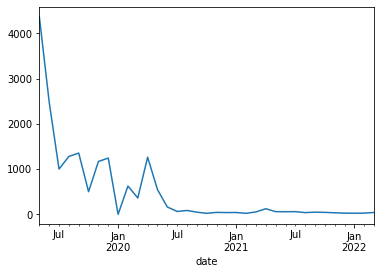

In [ ]:
tr_df['count'].plot()

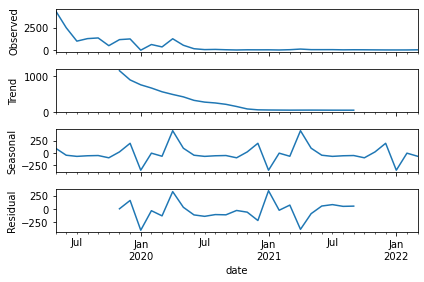

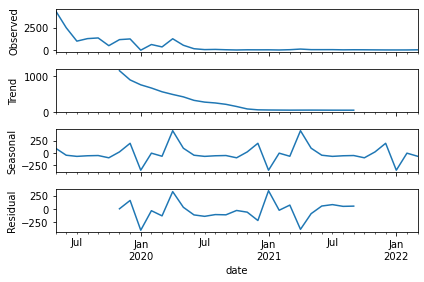

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_data = seasonal_decompose(tr_df['count'], model="additive")
decompose_data.plot()

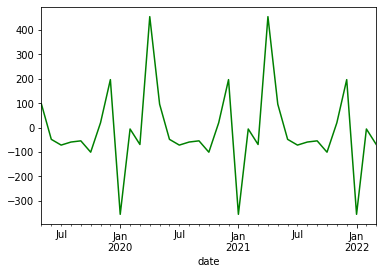

In [ ]:
seasonality=decompose_data.seasonal
seasonality.plot(color='green')

In [ ]:
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(tr_df['count'], autolag = 'AIC')
print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  -8.00584140012242
2. P-Value :  2.269009731576796e-12
3. Num Of Lags :  10
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 24
5. Critical Values :
	 1% :  -3.7377092158564813
	 5% :  -2.9922162731481485
	 10% :  -2.635746736111111


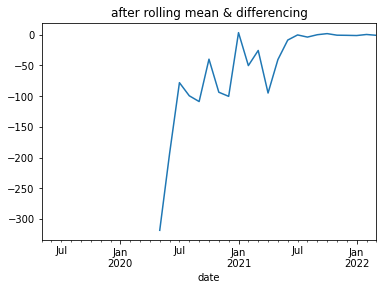

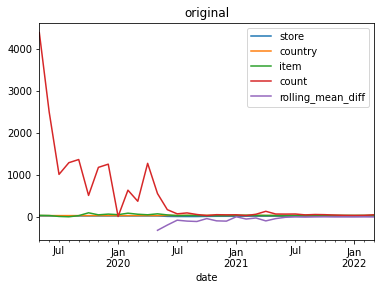

In [ ]:
rolling_mean = tr_df['count'].rolling(window = 12).mean()
tr_df['rolling_mean_diff'] = rolling_mean - rolling_mean.shift()
ax1 = plt.subplot()
tr_df['rolling_mean_diff'].plot(title='after rolling mean & differencing');
ax2 = plt.subplot()
tr_df.plot(title='original');


In [ ]:
dftest = adfuller(tr_df['rolling_mean_diff'].dropna(), autolag = 'AIC')
print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
  print("\t",key, ": ", val)

1. ADF :  -1.214791385245677
2. P-Value :  0.6672006862830328
3. Num Of Lags :  9
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 13
5. Critical Values :
	 1% :  -4.068853732362312
	 5% :  -3.1271488757396453
	 10% :  -2.7017297633136095


In [ ]:
from statsmodels.tsa.arima_model import ARIMA

model=ARIMA(tr_df['count'],order=(1,2,1))
history=model.fit()
history.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:               D2.count   No. Observations:                   33
Model:                 ARIMA(1, 2, 1)   Log Likelihood                -254.806
Method:                       css-mle   S.D. of innovations            516.481
Date:                Sun, 10 Jul 2022   AIC                            517.612
Time:                        01:50:40   BIC                            523.598
Sample:                    07-31-2019   HQIC                           519.626
                         - 03-31-2022                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             17.8273      8.590      2.075      0.047       0.992      34.663
ar.L1.D2.count    -0.0683      0.202     -0.338      0.738      -0.465       0.328
ma.L1.D2.count    -1.0000      0.120     -8.335      0.000      -1.235      -0.765
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1          -14.6380           +0.0000j           14.6380            0.5000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

In [ ]:
model_fit = model.fit()
tr_df['forecast']=model_fit.predict(start=10,end=70,dynamic=True)
tr_df[['count','forecast']].plot(figsize=(12,8))

ValueError: ignored

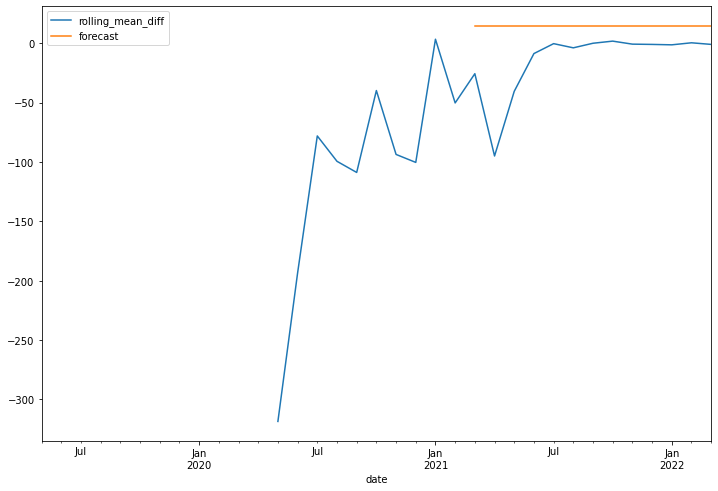

In [ ]:
model=ARIMA(tr_df['rolling_mean_diff'].dropna(),order=(0,1,0))
model_fit=model.fit()
tr_df['forecast']=model_fit.predict(start=10,end=70,dynamic=True)
tr_df[['rolling_mean_diff','forecast']].plot(figsize=(12,8))


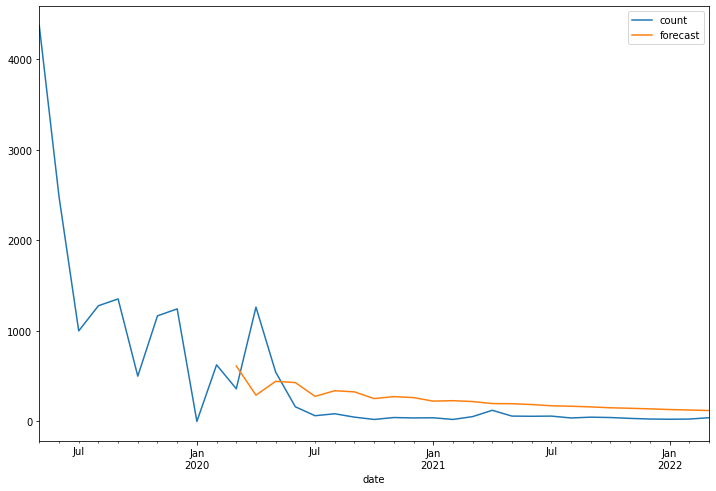

In [ ]:
model=sm.tsa.statespace.SARIMAX(tr_df['count'],order=(1, 0, 1),seasonal_order=(1,0,1,3))
results=model.fit()
tr_df['forecast']=results.predict(start=10,end=50,dynamic=True)
tr_df[['count','forecast']].plot(figsize=(12,8))


In [ ]:
import numpy as np
#handling the zero values before applying log transformation
if len(tr_df.loc[tr_df['count']==0]):
    print("Found records with zero, will add a constant (10)")
    tr_df['count'] = tr_df['count'] + 10

# Transform the dataframe:
ts_log = np.log(tr_df)
# Replace infs with NaN
ts_log.replace([np.inf, -np.inf], np.nan, inplace=True)
# Replace NaN with 0
ts_log.replace([np.nan], 0, inplace=True)
# Remove all the NaN values
ts_log.dropna(inplace=True)

ts_log = ts_log.asfreq(freq='M')
ts_log.index

## Get all rows with nan values:
# ts_log[np.isnan(ts_log).any(1)]

## CHECK OUTPUT OF HEAD():
ts_log.head()

## Given that the differencing operation makes the values at the beginning of the series go NaN,
## we must make sure to store those values so that we can then get the real values back later on.
## In this case, something like: ts_log_diff.fillna(0) + 6.008813

# Apply differencing:
ts_log_diff = ts_log - ts_log.shift()


## Get indices with inf values:
# ts_log_diff.index[np.isinf(ts_log_diff).any(1)]
## Get all rows with inf values:
# ts_log_diff[np.isinf(ts_log_diff).any(1)]

ts_log_diff.replace([np.inf, -np.inf], np.nan, inplace=True)
ts_log_diff.dropna(inplace=True)


Found records with zero, will add a constant (10)


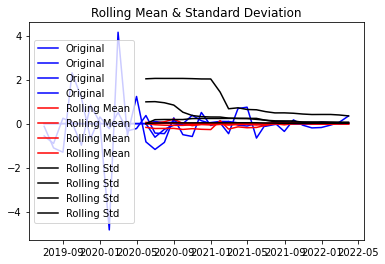

Results of Dickey-Fuller Test:
Test Statistic                 -3.806050
p-value                         0.002846
#Lags Used                      0.000000
Number of Observations Used    33.000000
Critical Value (1%)            -3.646135
Critical Value (5%)            -2.954127
Critical Value (10%)           -2.615968
dtype: float64


In [ ]:
## visualization
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    timeseries = timeseries.iloc[:,0].values
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
test_stationarity(ts_log_diff)

In [ ]:
tr_df.head()

,store,country,item,count
date,,,,
2019-05-31,23.0,31.0,37.666667,4376.666667
2019-06-30,23.0,31.0,33.222222,2493.333333
2019-07-31,23.0,31.0,11.000000,1010.000000
2019-08-31,23.0,31.0,3.000000,1288.000000
2019-09-30,23.0,31.0,30.200000,1363.000000


In [ ]:
# Function that trains the model with the received parameters
import statsmodels.api as sm
import itertools

def my_train_sarimax(tr_df, i_order=(2,1,2), i_freq='M', i_seasonorder=(2, 1, 1, 12), print_summary=False):
    mod = sm.tsa.statespace.SARIMAX(
                                    df.iloc[:,-1], # Variable to be predicted
                                    order= i_order,
                                    freq= i_freq 
                                    #,exog = ['isweekday', 'isweekend', 'inbetween25and5', 'holiday_weekend', 'holiday_weekday', 'holiday_Anho Nuevo',       'holiday_Batalla de Boqueron',       'holiday_Dia de la Fundacion de Asuncion',       'holiday_Dia de la Independencia Nacional',       'holiday_Dia de la Paz del Chaco',       'holiday_Dia de la Virgen de Caacupe',       'holiday_Dia de los Heroes de la Patria',       'holiday_Dia de los Trabajadores',       'holiday_Domingo de Resurreccion (Semana Santa)',       'holiday_Jueves Santo (Semana Santa)', 'holiday_Navidad',       'holiday_Viernes Santo (Semana Santa)', 'holiday_nan']
                                    ,exog = df.iloc[:,1:] # exogenous variables
                                    ,seasonal_order=i_seasonorder,
                                    enforce_stationarity=False,
                                    enforce_invertibility=False
                                   )

    results = mod.fit()
    
    if print_summary:
        print(results.summary().tables[1])
    
    return results

In [ ]:
df_item = df[df['item']=='item_ae']
df_item.tail()

,store,country,item,feature1,feature2,feature3,feature4,count,count(event),Total_Counts(count+count(event))
date,,,,,,,,,,
2022-03-25,store_b,country_c,item_ae,feature1_a,feature2_a,feature3_b,feature4_b,5.0,0.0,5.0
2022-03-27,store_e,country_f,item_ae,feature1_a,feature2_a,feature3_b,feature4_b,1.0,0.0,1.0
2022-03-27,store_k,country_x,item_ae,feature1_a,feature2_a,feature3_b,feature4_b,5.0,0.0,5.0
2022-03-28,store_e,country_f,item_ae,feature1_a,feature2_a,feature3_b,feature4_b,1.0,0.0,1.0
2022-03-30,store_i,country_l,item_ae,feature1_a,feature2_a,feature3_b,feature4_b,5.0,0.0,5.0
